**Assignment 1, Part 1**

In [1]:
import astropy as astr
import numpy as np
import urllib.request
import urllib.parse
import matplotlib.pyplot as plt

In [2]:
url = 'http://nesssi.cacr.caltech.edu/cgi-bin/getcssconedbid_release2.cgi'
values = {'Name' : 'Her X-1',
          'Rad' : '0.1',
          'DB' : 'Photcat', 
          'OUT' : 'HTML',
          'SHORT' :'short',
          '.submit' : 'Submit'}

data = urllib.parse.urlencode(values)
data = data.encode('ascii') 
req = urllib.request.Request(url, data)
with urllib.request.urlopen(req) as response:
   the_page = response.read() #the_page is now the HTML source of the page in bytes so we must convert

In [3]:
pagestr = the_page.decode() #change from bytes to string
bigdata = pagestr.split('\n')[104:482] #split the strings along the new lines and only take the data table strings
#print(bigdata)

In [4]:
smalldata=[]
for i, x in enumerate(bigdata):
    smalldata.append(x.split('<td>'))#creating a sublist of values for each time and removing the <td>
#print(smalldata)

In [5]:
#smalldata2 =smalldata[1:len(smalldata)-1]
for i, x in enumerate(smalldata):
    x.remove(x[0]) #gets rid of the '<tr>' element at the beginning of each sublist
    last = x[-1]
    x[-1] = last.strip('</tr>') #gets rid of the </tr> at the end of the last element of each sublist
#print(smalldata)

In [6]:
mag = []
time = []
for i,x in enumerate(smalldata):
    mag.append(float(x[1])) #creating a list of magnitudes
    time.append(float(x[-1])) #creating a list of times
#print(mag)

Text(0,0.5,'Magnitude')

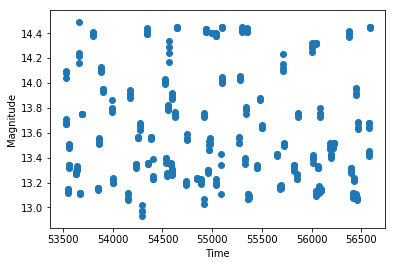

In [7]:
plt.scatter(time, mag) #plotting the list of times
plt.xlabel('Time')
plt.ylabel('Magnitude')

**Part 2**

In [8]:
#from astropy.io.votable import parse
from astropy.io.votable import parse_single_table
tablevot = parse_single_table("votable.xml")
#votable = parse("votable.xml", pedantic=False)

In [9]:
#for resource in votable.resources:
    #print(resource)
magvot = tablevot.array['Mag'].data
timevot = tablevot.array['ObsTime'].data


Text(0,0.5,'Magnitude')

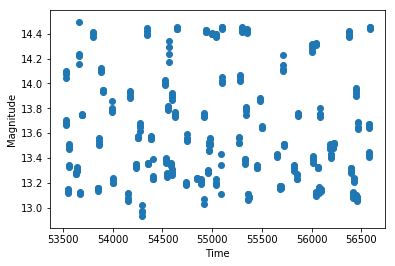

In [10]:
plt.scatter(timevot, magvot) #plotting the list of times
plt.xlabel('Time')
plt.ylabel('Magnitude')